In [1]:
import os
import json
from web3 import Web3, HTTPProvider


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import datetime

In [2]:
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
web3 = Web3(HTTPProvider(f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}"))

In [3]:
pool_addr = "0x98638FAcf9a3865cd033F36548713183f6996122"
lp_token_addr = "0x8282BD15dcA2EA2bDf24163E8f2781B30C43A2ef"
tricrypto_addr = "0xD51a44d3FaE010294C616388b506AcdA1bfAAE46"

In [4]:
admin_2 = "0xA464e6DCda8AC41e03616F95f4BC98a13b8922Dc"
admin = "0xeCb456EA5365865EbAb8a2661B0c503410e9B347"

In [5]:
pool_addr.lower()

'0x98638facf9a3865cd033f36548713183f6996122'

In [6]:
with open("./spelleth.json", 'r') as f:
    abi = json.load(f)
pool = web3.eth.contract(address=pool_addr, abi=abi)

with open("../tricrypto/tricrypto2.json", 'r') as f:
    abi = json.load(f)
tricrypto2 = web3.eth.contract(address=tricrypto_addr, abi=abi)

In [7]:
start_block = 13931741
current_block = web3.eth.get_block_number()

In [8]:
datetime.datetime.fromtimestamp(web3.eth.getBlock(13685675)['timestamp'])

datetime.datetime(2021, 11, 25, 21, 50, 4)

In [9]:
transfer_filter = pool.events.ClaimAdminFee.createFilter(
    fromBlock=start_block,
    toBlock=current_block
)
all_transfers = transfer_filter.get_all_entries()

In [10]:
len(all_transfers)

17

In [15]:
fees_for_range = []
claimed_lp_tokens = 0
for transfer in all_transfers:

    value = transfer['args']['tokens']
    block = transfer['blockNumber']
    tx_hash = transfer['transactionHash'].hex()
    claimed_lp_tokens = value * 1e-18
    virtual_price = pool.functions.virtual_price().call(block_identifier=block) * 1e-18
    token_price = pool.functions.price_oracle().call(block_identifier=block) * 1e-18
    lp_token_price = pool.functions.lp_price().call(block_identifier=block) * 1e-18
    eth_price = tricrypto2.functions.price_oracle(1).call(block_identifier=block) * 1e-18
    timestamp = datetime.datetime.fromtimestamp(web3.eth.getBlock(block)['timestamp'])

    dict_fees = {
        'block': block,
        'timestamp': timestamp,
        'lp_tokens': claimed_lp_tokens,
        'virtual_price': virtual_price,
        'lp_token_price': lp_token_price,
        'token_price': token_price,
        'eth_price': eth_price,
        'total_claimed_eth': claimed_lp_tokens * lp_token_price,
        'total_claimed_usd': claimed_lp_tokens * lp_token_price * eth_price,
        'tx_hash': tx_hash
    }
    fees_for_range.append(dict_fees)

df_fees = pd.DataFrame(fees_for_range)
df_fees

,block,timestamp,lp_tokens,virtual_price,lp_token_price,token_price,eth_price,total_claimed_eth,total_claimed_usd,tx_hash
0,14078306,2022-01-26 02:26:18,923.940674,1.002050,0.003536,0.000003,2430.898094,3.267511,7942.986279,0xda26abfd1f1f7084dece51068ee3bc564a58f046ca9b...
1,14078535,2022-01-26 03:14:48,8.770243,1.002056,0.003512,0.000003,2443.471534,0.030800,75.259877,0x2128f2391be66eff7dfa20bce28487c0892e4b927192...
2,14078657,2022-01-26 03:41:19,2.522257,1.002073,0.003535,0.000003,2450.649339,0.008916,21.850593,0xf8ac0f295662d1223bd81ae6a13d38c855b1d516665a...
3,14078779,2022-01-26 04:11:20,9.730275,1.002094,0.003547,0.000003,2449.751118,0.034517,84.557410,0xd42bccf3ece92005937ca9e65af5725c2305e896f823...
4,14086549,2022-01-27 09:10:14,156.810678,1.002486,0.003134,0.000002,2410.191015,0.491418,1184.412145,0xea23a8422c222eedc37873d73cc967c4579aa5f6bd29...
5,14086550,2022-01-27 09:10:19,1.250281,1.002495,0.003135,0.000002,2410.191015,0.003919,9.445740,0x878dc71efd695d6d36f2cd3c9da540a319a355cdf92e...
6,14086581,2022-01-27 09:19:10,4.155621,1.002490,0.003166,0.000002,2405.701462,0.013156,31.648742,0x2f586ee2cbfe1fd7c410ac59dd3690e140917f6d55ad...
7,14087078,2022-01-27 11:11:05,25.386490,1.002543,0.003114,0.000002,2441.658111,0.079047,193.004803,0xbfca5a802b38cf0e99f0877a44dc7e0fce35230973cb...
8,14087284,2022-01-27 11:55:09,18.921461,1.002584,0.003132,0.000002,2431.264695,0.059268,144.096455,0x5738bc1f5269594f8d5eb65bbc38c37d639069739b36...
9,14087889,2022-01-27 14:19:01,33.238338,1.002680,0.003265,0.000003,2461.508423,0.108522,267.126947,0x16a5d1221eabae2b57981cfbae968cfc071c5b53d913...


In [16]:
print(df_fees.where(df_fees.total_claimed_usd == df_fees.total_claimed_usd.max()).tx_hash.dropna().values[0])

0xda26abfd1f1f7084dece51068ee3bc564a58f046ca9b2e82315b97284b7bce8a


In [17]:
df_fees.set_index('timestamp', inplace=True)

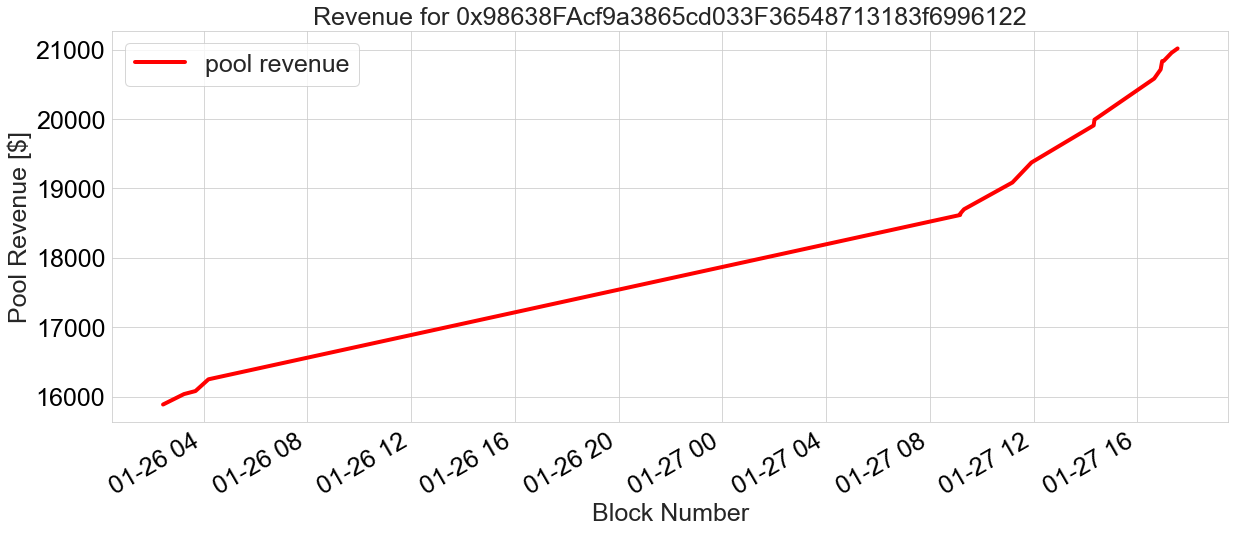

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_claimed_usd']*2).cumsum().plot(
    ax=ax,
    color='red',
    label='pool revenue',
    lw=4
)

ax.set_ylabel("Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_title(f"Revenue for {pool_addr}", fontsize=25)
ax.legend(fontsize=25);

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_claimed_usd']*2).cumsum().plot(
    ax=ax,
    color='red',
    label='pool revenue',
    lw=4
)

ax.set_ylabel("Price [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_title(f"Revenue for {pool_addr}", fontsize=25)
ax.legend(fontsize=25);

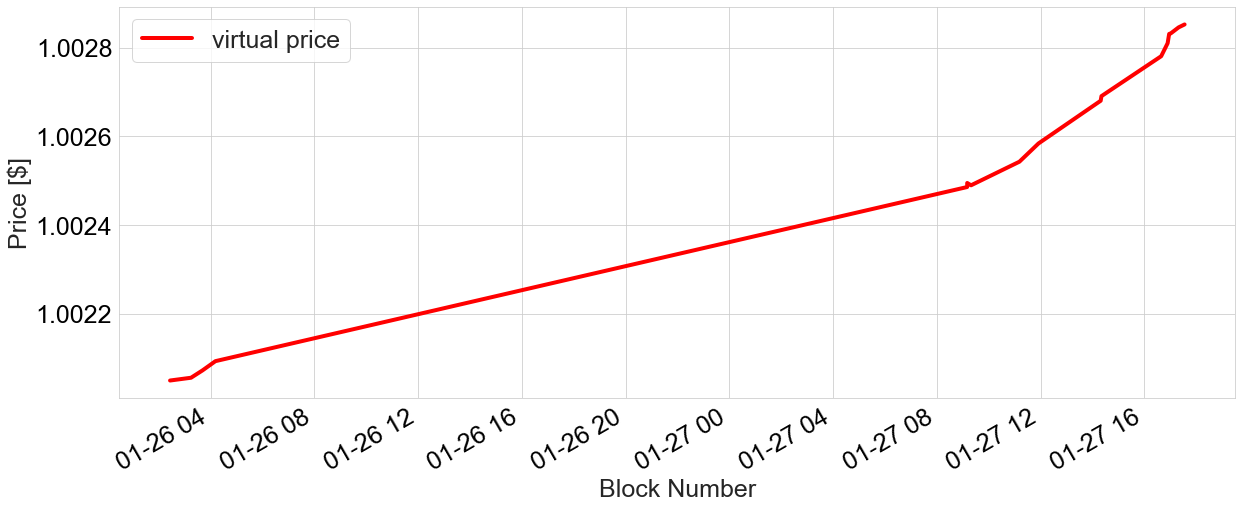

In [24]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['virtual_price']).plot(
    ax=ax,
    color='red',
    label='virtual price',
    lw=4,
)

ax.set_ylabel("Price [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

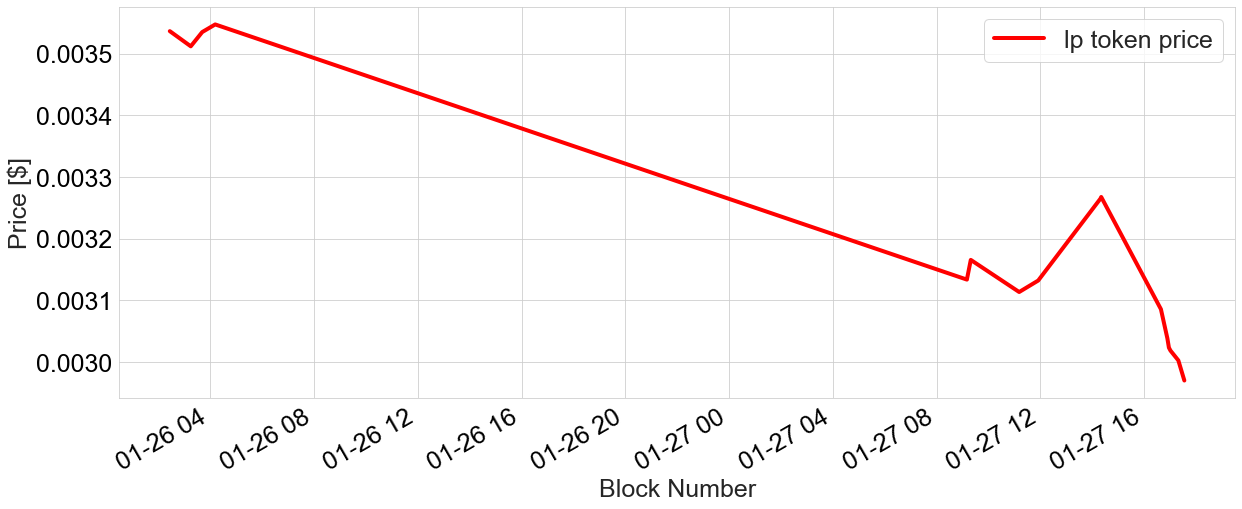

In [29]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['lp_token_price']).plot(
    ax=ax,
    color='red',
    label='lp token price',
    lw=4,
)

ax.set_ylabel("Price [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);